<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Percentage-Plots" data-toc-modified-id="Percentage-Plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Percentage Plots</a></span></li></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

import matplotlib.ticker as mticker
import seaborn as sns
import os
from ast import literal_eval
import pandas as pd
import glob

In [2]:
df_tmp = pd.read_csv('hypers.csv')
df_tmp = df_tmp[['learning_rate', 'simclr_tau', 'batch_size', 'best_test_accuracy_lr']]
df_tmp.loc[:,'best_test_accuracy_lr'] *= 100
lr_map = {"2e-05": 0, "0.0002": 1, "0.002": 2}
df_tmp['learning_rate']  = df_tmp['learning_rate'].apply(lambda x: lr_map[str(x)])
df_tmp

,learning_rate,simclr_tau,batch_size,best_test_accuracy_lr
0,0,0.50,128,47.555556
1,0,1.00,128,48.666667
2,0,0.05,128,51.333333
3,0,0.10,128,51.777778
4,0,0.01,128,50.888889
5,0,1.00,64,47.555556
6,0,0.50,64,48.888889
7,0,0.10,64,48.444444
8,0,0.05,64,51.555556
9,0,0.01,64,54.222222


[ 2.    0.99 64.    8.8 ]


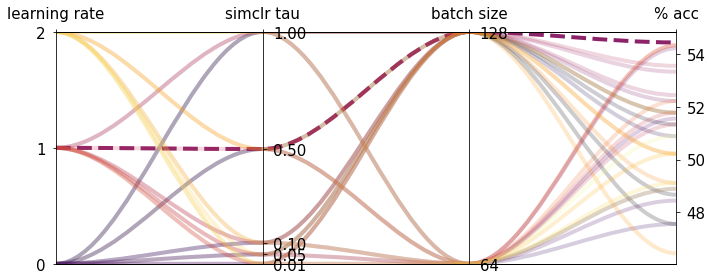

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
from sklearn import datasets

with_labels = True
fontsize=15

cmap = mpl.cm.get_cmap("inferno", 30)
df_tops= [11]

ynames = ["learning rate", "simclr tau", "batch size", "% acc"]
if with_labels:
    target_names = df_tops # df_tmp.index
else:
    target_names = ["      "] * len(df_tmp.index)
# display(df_tmp)
ys = df_tmp.to_numpy()
# display(ys)
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
# dys[3] = 60

ymins[-1] -= dys[-1] * 0.05  # add 5% padding below and above
ymaxs[-1] += dys[-1] * 0.05

# ymaxs[1], ymins[1] = ymins[1], ymaxs[1]  # reverse axis 1 to have less crossings
dys = ymaxs - ymins
print(dys)

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

fig, host = plt.subplots(figsize=(10,4))

axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]

for i, ax in enumerate(axes):
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
    
    if not with_labels:
        ax.set_yticklabels([])
    
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.tick_params(labelsize=fontsize, pad=7)
    if i == 0:
#         ax.set_yscale('log')
#         ax.spines['top'].set_visible(True)
#         ax.spines['bottom'].set_visible(True)
        ax.set_yticks([0, 1, 2])
#         ax.set_yticklabels(["0.0002", "0.00002", "0.000002"])
#         ax.ticklabel_format(useMathText=True)
    if i == 1:
#         ax.spines['top'].set_visible(True)
#         ax.spines['bottom'].set_visible(True)
        ax.set_yticks([0.01, 0.05, 0.1, 0.5, 1])
    if i == 2:
#         ax.spines['top'].set_visible(True)
#         ax.spines['bottom'].set_visible(True)
        ax.set_yticks([64, 128])
    if i == 3:
        ax.set_ylim(ymins[i], ymaxs[i])
#         ax.spines['top'].set_visible(True)
#         ax.spines['bottom'].set_visible(True)
# #         ax.set_yticks([])
#         ax.set_yticks(list(range(ymins[3], , 5)))
    
        
host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
if with_labels:
    host.set_xticklabels(ynames, fontsize=14)
else:
    host.set_xticklabels([], fontsize=14)

host.tick_params(axis='x', which='major', labelsize=fontsize, pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
# if with_labels:
#     host.set_title('Hyperparameters for GraphCL - sr(3, 10)', fontsize=18, pad=12)

colors = plt.cm.tab20b.colors

legend_handles = [None for _ in range(ys.shape[0])]
for j in range(ys.shape[0]):
#     print(zs[j, :])
#     print(zs[j, :] + 1)
#     break
    # create bezier curves
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
#     print(verts)
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
#     patch = patches.PathPatch(path, facecolor='none', lw=2, alpha=0.7, edgecolor=colors[iris.target[j]])
#     patch = patches.PathPatch(path, facecolor='none', lw=2, alpha=0.7, edgecolor=cmap(zs[j, 5]))
#     edgecolor = "grey"
    alpha = 0.2
    j_ind = df_tmp.index[j]
    linestyle = "-"
    if j_ind in df_tops:
        edgecolor = cmap(df_tops.index(j_ind))
        alpha = 1
        linestyle = "--"
    
    patch = patches.PathPatch(path, facecolor='none', lw=4, linestyle=linestyle, alpha=alpha, edgecolor=cmap(j))#, edgecolor=edgecolor)

    if j_ind in df_tops:
        legend_handles[df_tops.index(j_ind)] = patch
    host.add_patch(patch)

# host.legend(legend_handles, target_names,
#         loc='lower center', bbox_to_anchor=(0.5, -0.2),
#         ncol=6)
plt.tight_layout()

# Fixing the exploration C's labels from enumerates to sqrt values
# if with_labels:
#     ax = axes[4]
#     print(type([item.get_text() for item in ax.get_yticklabels()]))
#     labels = [val2name.get(float(ind.get_text()), "") for ind in ax.get_yticklabels()]
#     print(labels)
#     ax.set_yticklabels(labels)

if not with_labels:
    plt.savefig('besier.pdf') 
plt.show()

# Percentage Plots

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# modify global setting
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

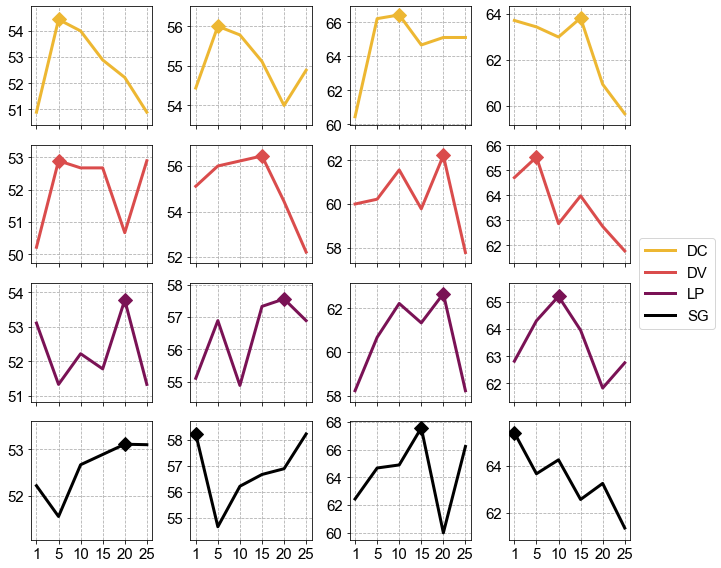

In [8]:
from matplotlib.ticker import MaxNLocator
plt.rcParams["figure.figsize"] = (9, 8)
plt.rcParams["legend.markerscale"] = 0.0

fig, axs = plt.subplots(4, 4, sharex=True, sharey=False)

show_labels = False
percentages = [1, 5, 10, 15, 20, 25]
perturbations = ["DC", "DV", "LP", "SG"]
colors = ['#EDB732', '#DA4C4C', '#7A1255', '#000000']

def draw(dataset_name, ax, data, first_col=True):
    fontsize=15
    padding = 0.5
    lns = []
    
    for i, line in enumerate(data):
        markersize=0
        markevery=[]
        if first_col:
            markevery = [np.argmax(line)]
            markersize=10
            
        x = range(len(line))
        lns += ax[i].plot(x, line, marker='D', markersize=markersize, markevery=markevery, linewidth=3, color=colors[i], label = perturbations[i])

        ax[i].set_xticks(x)
        ax[i].set_xticklabels(percentages, fontsize=fontsize)
        ax[i].tick_params(labelsize=fontsize)
        
        ax[i].yaxis.set_major_locator(MaxNLocator(nbins=5, integer=True))

        ax[i].set_ylim(min(line) - padding , max(line) + padding)
        
        if show_labels:
            if i==len(perturbations) - 1: # last row
                ax[i].set_xlabel(dataset_name, fontsize=fontsize)
            if first_col:
                ax[i].set_ylabel(perturbations[i], fontsize=fontsize)
        ax[i].grid(True, linestyle="--")
    
    

    return lns

# SR(3, 10)
data1 = [[50.89, 54.44, 54.00, 52.89, 52.22, 50.89],
        [50.22, 52.89, 52.67, 52.67, 50.67, 52.89],
        [53.11, 51.33, 52.22, 51.78, 53.78, 51.33],
        [52.22, 51.56, 52.67, 52.89, 53.11, 53.10]]
draw("SR(3, 10)", axs[:, 0], data1, first_col=True)

# Power
data2 = [[54.44, 56.00, 55.78, 55.11, 54.00, 54.89],
        [55.11, 56.00, 56.22, 56.44, 54.44, 52.22],
        [55.11, 56.89, 54.89, 57.33, 57.56, 56.89],
        [58.22, 54.67, 56.22, 56.67, 56.89, 58.22]]
draw("Power", axs[:, 1], data2)

# DoublePower
data3 = [[60.44, 66.22, 66.44, 64.67, 65.11, 65.11],
        [60.00, 60.22, 61.56, 59.78, 62.22, 57.78],
        [58.22, 60.67, 62.22, 61.33, 62.67, 58.22],
        [62.44, 64.67, 64.89, 67.56, 60.00, 66.22]]
draw("Double Power", axs[:, 2], data3)

# Popularity
data4 = [[63.7, 63.42, 62.98, 63.81, 60.93, 59.65],
        [64.71, 65.53, 62.87, 63.98, 62.76, 61.78],
        [62.82, 64.31, 65.21, 63.96, 61.83, 62.76],
        [65.41, 63.67, 64.26, 62.58, 63.26, 61.37]]
handles = draw("Popularity", axs[:, 3], data4)

# handles, labels = ax.get_legend_handles_labels()
labels = [l.get_label() for l in handles]


fig.tight_layout()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=[1.12, 0.5], ncol=1, prop={'size': 15})
plt.savefig("percent_plot_gcl.pdf", bbox_inches='tight')
plt.show()

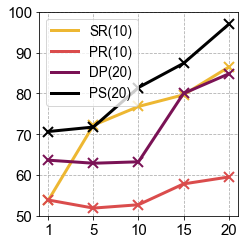

In [216]:
from matplotlib.ticker import MaxNLocator
plt.rcParams["figure.figsize"] = (3.5, 3.5)
plt.rcParams["legend.markerscale"] = 0.0

fig, ax = plt.subplots(1, 1, sharex=True, sharey=False)

show_labels = True
percentages = [1, 5, 10, 15, 20]
perturbations = ["SR(10)", "PR(10)", "DP(20)", "PS(20)"]
colors = ['#EDB732', '#DA4C4C', '#7A1255', '#000000']

def draw(dataset_name, ax, data, first_col=False):
    fontsize=15
    padding = 1
    lns = []
    
    x = range(len(data[0]))
    ax.set_xticks(x)
    ax.set_xticklabels(percentages, fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5, integer=True))
    ax.set_ylim(np.min(data) - padding , np.max(data) + padding)
    ax.set_ylim(50, 100)
    for i, line in enumerate(data):
        markersize=10
#         if first_col:
#             markevery = [np.argmax(line)]
#             markersize=10
                   
        lns += ax.plot(x, line, marker='x', markersize=markersize, markeredgewidth=2, linewidth=3, color=colors[i], label = perturbations[i])
            
        ax.grid(True, linestyle="--")

    return lns

# SR(3, 10)
data1 = [[53.82, 72.21, 76.81, 79.67, 86.44],
        [53.87, 51.89, 52.71, 57.82, 59.51],
        [63.64, 62.89, 63.24, 80.00, 84.79],
        [70.67, 71.76, 81.45, 87.39, 96.93]]
handels = draw("SR(3, 10)", ax, data1, first_col=True)


labels = [l.get_label() for l in handles]


fig.tight_layout()
ax.legend(handles, labels, loc='best', ncol=1, prop={'size': 13.5})
plt.savefig("percent_plot_ours.pdf", bbox_inches='tight')
plt.show()